# Predicting Insurance Cost

### In this mini-project, our goal is the use a linear regression model to predict insurance costs based off of various factors:
#### > age (customer's age)
#### > sex (gender of customer)
#### > bmi (body mass index of customer)
#### > children (number of children customer has)
#### > smoker (smoking status of customer)
#### > region (region of U.S. customer resides in)
#### > charges (Individual medical costs billed by health insurance)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## 1. Exploring the Dataset

In [4]:
insurance = pd.read_csv('insurance.csv')
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


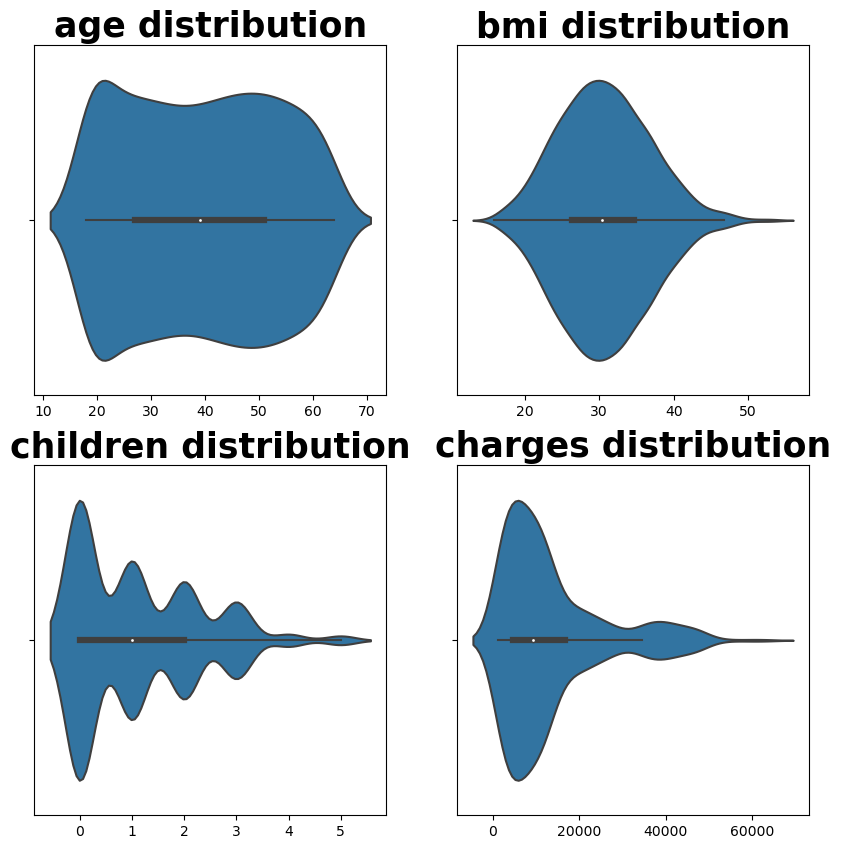

In [11]:
plt.figure(figsize=(10,10))

num_dist=['age','bmi','children','charges']

for i, num in enumerate(num_dist):
    plt.subplot(2,2,i+1)
    sns.violinplot(data=insurance, x=num)
    plt.title(f'{num} distribution', weight='bold', fontsize=25)
    plt.xlabel('')
plt.show()    

#### > age distribution (Min: 18, Max:64, Mean: 39)
#### > bmi distribution (Min: 16, Max:53, Mean: 31)
#### > children distribution (Min: 0, Max:5, Mean: 1.2)
#### > charges distribution (Min: 1,122, Max:63,770, Mean: 13,270)
### All the distributions look reasonable with no null values.

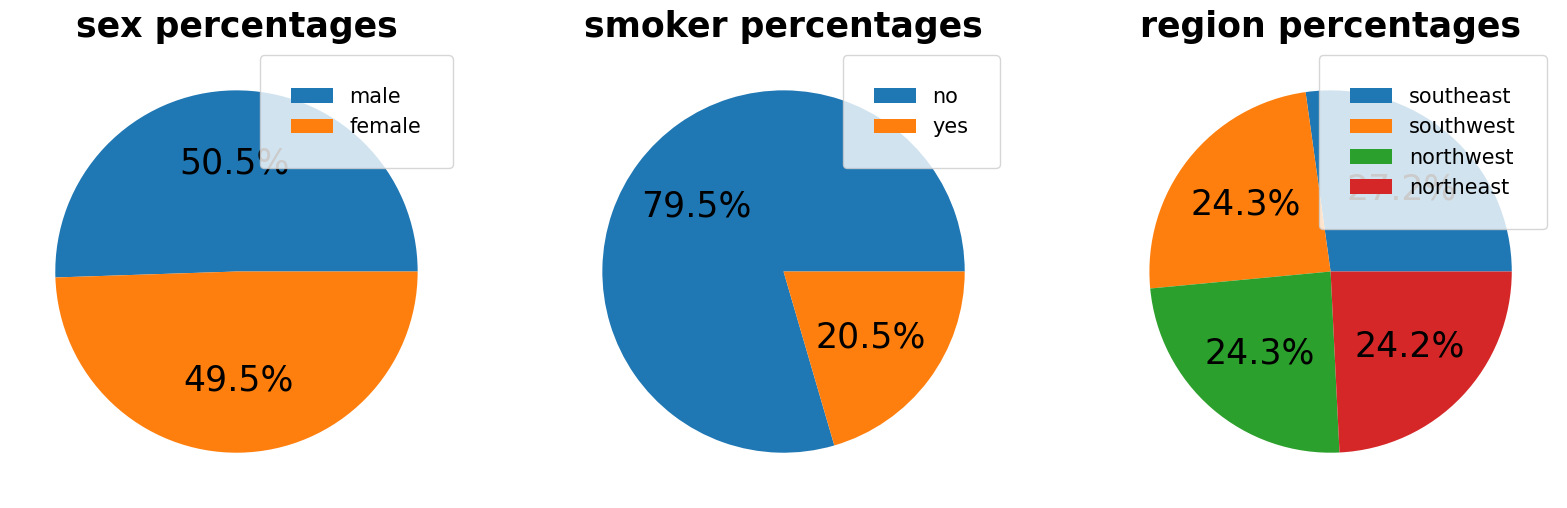

In [20]:
cat_dist=['sex','smoker','region']
plt.figure(figsize=(20,20))

for i, cat in enumerate(cat_dist):
    plt.subplot(3, 3, i+1)
    insurance[cat].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labeldistance=None,textprops={'fontsize': 25})
    plt.title(f'{cat} percentages', weight='bold', fontsize=25)                                                    
    plt.ylabel('')  
    plt.legend(fontsize=15, borderpad=1.5)
plt.show()   

#### > Sex is split evenly between genders. Smoker's take up about 21% of dataset. Region population is also fairly even across the four regions.



Text(0.5, 1.0, 'Charges vs Region')

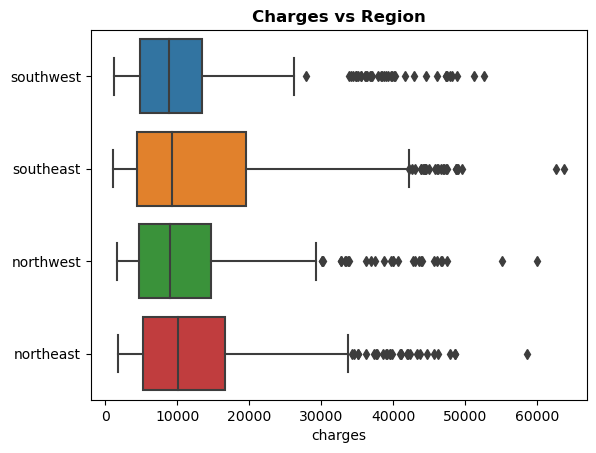

In [21]:
sns.boxplot(data=insurance, x='charges', y='region')
plt.ylabel('')
plt.title('Charges vs Region', weight='bold')

### No meaningful differences in charges vs regions. Regions will be removed from the dataset. Next, the catagorical columns sex and smoker will be changed to numerical values.

#### > Male = 1
#### > Female = 0
#### > Smoker=1
#### > Non-Smoker=0

In [25]:
# make a copy and drop the region column
insurance_modif = insurance.copy()
insurance_modif = insurance_modif.drop(columns='region')

# now we reshape the sex column to numerical (1=Male and 0=Female)
insurance_modif['sex'] = insurance_modif['sex'].apply(lambda x : 1 if x == 'Male' else 0)
# and we also reshape smoker column to numerical (1=Smoker and 0=Non-smoker)
insurance_modif['smoker'] = insurance_modif['smoker'].apply(lambda x : 1 if x == 'yes' else 0)

insurance_modif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


Text(0.5, 1.0, "Pearson's Correlation Chart")

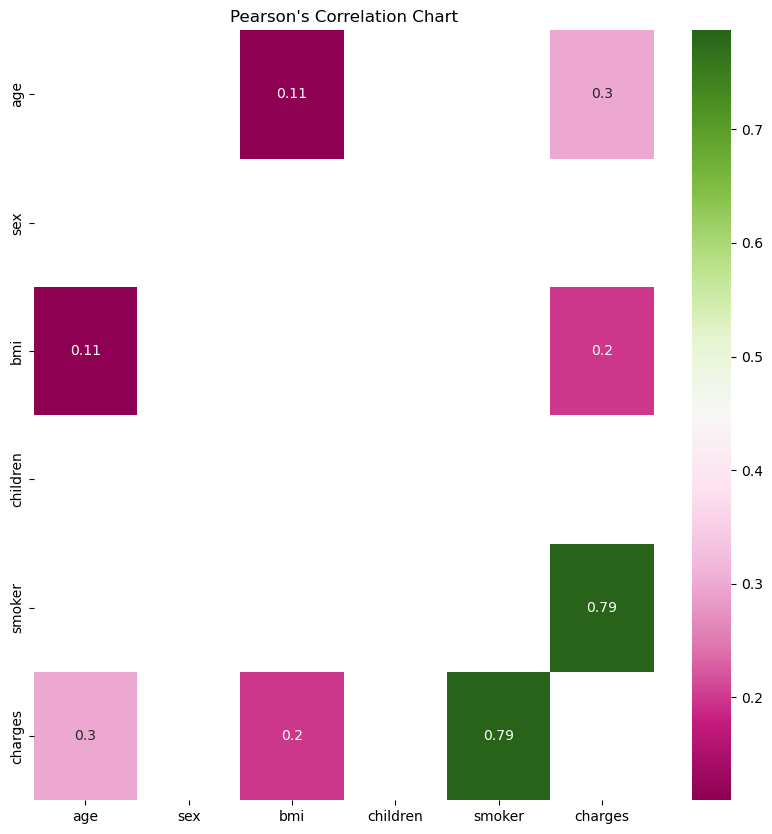

In [29]:
# now we can study them correlations
corr=abs(insurance_modif.corr())
plt.figure(figsize=(10,10))
sns.heatmap(corr[(corr>0.1)&(corr<1)], cmap="PiYG", annot=True)
plt.title("Pearson's Correlation Chart") 

#### > The three features with the highest correlations with charges are age, bmi, and smoker.



## 2. Dividing the Data

### The data will be divided between predictors and outcome.



In [31]:
X = insurance_modif.drop(columns='charges')
y = insurance_modif['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=39)

## 3. Building the Model

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)

train_mse = mean_squared_error(y_train, train_predictions, squared=False)

coefficient=model.coef_

R2=r2_score(y_train, train_predictions)

print(f'root mean squared error is {train_mse:.7}')
print(f'R2 is {R2:.2}')

root mean squared error is 5983.722
R2 is 0.75


In [38]:
coefficient_table=pd.DataFrame(data=coefficient,index=['age','sex','bmi','children','smoker'])
coefficient_table=coefficient_table.rename(columns={0:'coefficient'})
coefficient_table=coefficient_table.round(2)
intercept=model.intercept_

print(f'Intercept of the model is {intercept}')

coefficient_table

Intercept of the model is -11852.418650305293


,coefficient
age,257.00
sex,-0.00
bmi,314.69
children,425.41
smoker,23608.46


## 4. Residual Diagnostics
#### A residuals plot is a scatter plot of the model predictions (x-axis) against their associated residuals (y-axis). This is the tool that we'll use to check the constant variance.

Text(0, 0.5, '')

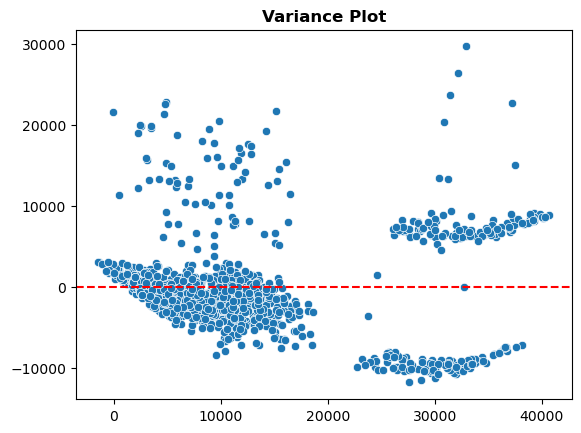

In [39]:
residuals=y_train-train_predictions
sns.scatterplot(x=train_predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Variance Plot', weight='bold')
plt.ylabel('')

#### Next, will transform the outcome so that extreme values are less pronounced. The transformation that will be used is a log-transformation. The model will now predict the log of the outcome instead of the outcome itself.

root mean squared error is 0.637567
R2 is 0.77
          coefficient
age              0.05
sex              0.00
bmi              0.02
children         0.15
smoker           2.22
Intercept of the model is 10.026510005875371


Text(0.5, 1.0, 'Variance Plot (Log Y)')

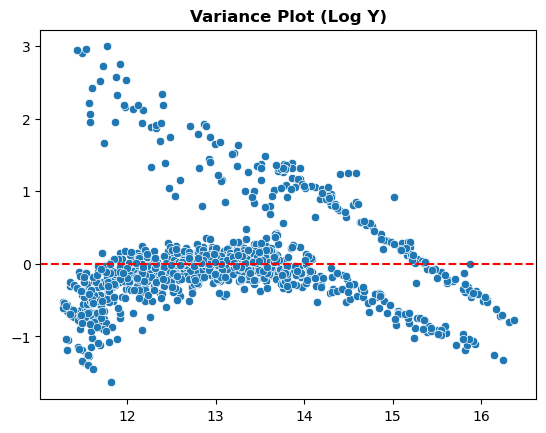

In [40]:
y_train_log=np.log2(y_train)

model = LinearRegression()
model.fit(X_train, y_train_log)
train_predictions = model.predict(X_train)

train_rmse = mean_squared_error(y_train_log, train_predictions, squared=False)

coefficient=model.coef_

R2=r2_score(y_train_log, train_predictions)

print(f'root mean squared error is {train_rmse:.7}')
print(f'R2 is {R2:.2}')

coefficient_table=pd.DataFrame(data=coefficient,index=['age','sex','bmi','children','smoker'])
coefficient_table=coefficient_table.rename(columns={0:'coefficient'})
coefficient_table=coefficient_table.round(2)

intercept=model.intercept_
print(coefficient_table)
print(f'Intercept of the model is {intercept}')

residuals=y_train_log-train_predictions
sns.scatterplot(x=train_predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel('')
plt.title('Variance Plot (Log Y)', weight='bold')

#### Doing the log-transformation has increased the R2 value from 0.75 to 0.77. This is a very minimal improvement. Next will redo the model using less features with the highest correlation to outcome.

root mean squared error is 0.6607471
R2 is 0.75
Intercept of the model is 10.154901422985983
        coefficient
smoker         2.23
age            0.05
bmi            0.02


Text(0.5, 1.0, 'Variance Plot (Log Y)')

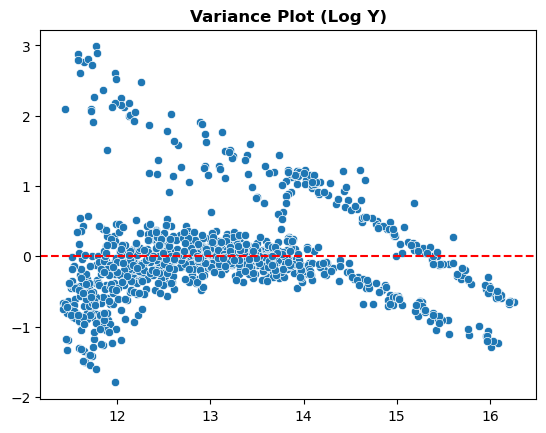

In [41]:
# Reran with X_subset using features with highest correlation.

X_subset=insurance_modif.copy()[['smoker','age','bmi']]

X_train, X_test, y_train, y_test=train_test_split(X_subset,y,test_size=0.2, random_state=39)

y_train_log=np.log2(y_train)

model = LinearRegression()
model.fit(X_train, y_train_log)
train_predictions = model.predict(X_train)

train_rmse = mean_squared_error(y_train_log, train_predictions, squared=False)

coefficient=model.coef_

R2=r2_score(y_train_log, train_predictions)

print(f'root mean squared error is {train_rmse:.7}')
print(f'R2 is {R2:.2}')

coefficient_table=pd.DataFrame(data=coefficient,index=['smoker','age','bmi'])
coefficient_table=coefficient_table.rename(columns={0:'coefficient'})
coefficient_table=coefficient_table.round(2)
intercept=model.intercept_

print(f'Intercept of the model is {intercept}')

print(coefficient_table)

residuals=y_train_log-train_predictions
sns.scatterplot(x=train_predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel('')
plt.title('Variance Plot (Log Y)', weight='bold')

## 5. Final Model Evaluation
#### Due to how small of an effect transforming outcome to log value has the final model will use no transformations. Final model will fit using unmodified X_train and Y_train (no log transformations) and then use the model to make prdictions using the X_test dataset and check root mean error with y_test.

In [42]:
X=insurance_modif.drop(columns='charges')
y=insurance_modif['charges']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=39)

model = LinearRegression()
model.fit(X_train, y_train)

test_pred = model.predict(X_test)


R2=r2_score(y_test, test_pred)
test_rmse=mean_squared_error(y_test, test_pred, squared=False)

intercept_final=model.intercept_
coefficient_final=model.coef_

print(f'Intercept of the model is {intercept_final}')

print(f'root mean squared error is {test_rmse:.9}')
print(f'R2 is {R2:.2}')

coefficient_table=pd.DataFrame(data=coefficient_final,index=['age','sex','bmi','children','smoker'])
coefficient_table=coefficient_table.rename(columns={0:'coefficient'})
coefficient_table=coefficient_table.round(2)
coefficient_table

Intercept of the model is -11852.418650305293
root mean squared error is 6347.04822
R2 is 0.75


,coefficient
age,257.00
sex,-0.00
bmi,314.69
children,425.41
smoker,23608.46


### Intercept indicates that without taking into account any other factors; costs start at -11,824 USD. Costs tend to increase with higher age and bmi. According to this model, for every year of life cost tends to increase by 257 USD and for every increase by 1 bmi increase costs by 315 USD. Women tend to cost less to insure. Smoking has a very high coefficient with increasing costs.

### The R2 value of the final model matches the R2 value of the training model (0.75).

#### > Training RMSE = 5983.61
#### > Test RMSE = 6346.1619
### RMSE of both models are fairly close indicating that the model is not overfit.

### We might improve the model by including more complex terms in the regression, such as interactions or quadratic terms.